# Introducción a OpenCV en Python

FICH, UNL - Procesamiento digital de Imágenes
Gaggion Zulpo, Rafael Nicolás
21 de Marzo de 2019

# Instalación de Python

Se recomienda el uso de Anaconda, dado que por defecto viene con algunas librerías útiles instaladas junto con Jupyter, para la utilización de notebooks, y Spyder, un entorno de desarrollo muy similar a Matlab.
Pueden descargar Anaconda aquí:
https://www.anaconda.com/distribution/

En caso de trabajar con Python directamente, o mediante otro IDE de preferencia, se deberán instalar también las librerías Matplotlib y NumPy mediante pip, con el siguiente comando:

pip install numpy matplotlib

# Instalación de OpenCV

En caso de utilizar Anaconda, se puede instalar vía terminal con:

conda install -c conda-forge opencv

En caso de utilizar Python sin haber instalado Anaconda se puede instalar mediante:

pip install opencv-python

# Funcionalidades básicas

Para importar las librerías necesarias debemos utilizar los siguientes comandos:

In [1]:
import cv2 #Para manejo de imagenes
import numpy as np #Para manejo de arrays

Para la lectura de imagenes podemos abrir imagenes guardadas en el disco mediante el siguiente comando

In [2]:
#Cargo una imagen desde un archivo utilizando el comando cv2.imread("path")

img = cv2.imread("OpenCV-Logo.png")

#Puedo cargar una imagen en escala de grises utilizando la bandera cv2.IMREAD_GRAYSCALE

img_gray = cv2.imread("OpenCV-Logo.png", cv2.IMREAD_GRAYSCALE)

Las imágenes cargadas mediante OpenCV utilizan de fondo arrays de NumPy, por lo tanto se pueden ver los atributos de la misma manera que un array

In [23]:
#Podemos ver el tamaño de la imagen utilizando el siguiente comando

shape = img.shape
print("Dimensiones imagen color: ", shape)

#Notar que la imagen en colores tiene 3 canales B, G y R debido al funcionamiento interno de OpenCV

shape_gray = img_gray.shape
print("Dimensiones imagen en escala de grises: ", shape_gray)

#Podemos ver el tipo de dato del arreglo utilizando el siguiente comando

tipo = img.dtype
print("Tipo de dato de la imagen", tipo)

#Por defecto, OpenCV carga las imagenes en enteros sin signo de 8 bits ('uint8')
#Se deberá tener cuidado al restar o sumar porque no guarda numeros menores a 0 o mayores a 255

Dimensiones imagen color:  (222, 180, 3)
Dimensiones imagen en escala de grises:  (222, 180)
Tipo de dato de la imagen uint8


Si queremos cargar una imagen vacía podemos crearla haciendo un arrays de 0s en numpy.
El comando np.zeros tiene como entradas el tamaño, y se puede especificar el tipo de datos que por defecto es float64

In [3]:
img_vacia = np.zeros(img.shape, dtype = img.dtype)

#También podemos especificar que tenga mismo tamaño y tipo de datos que una imagen que ya hayamos cargado con

img_vacia = np.zeros_like(img)

#Son formas equivalentes de hacer lo mismo

# Mostrando Imagenes con cv2.imshow()

Para mostrar imagenes en pantalla podemos utilizar cv2.imshow()
Esta función tiene buenas funcionalidades extras que se pueden agregar, como barras deslizables para modificar parametros, pero tiende a tener algunas fallas dependiendo de la versión instalada de OpenCV.

In [4]:
#La muestro en una ventana de OpenCV utilizando cv2.imshow("NombreVentana",imagen)
#Cerrar la ventana apretando la tecla q, para evitar que se cuelgue

cv2.imshow("Color", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow("Grayscale", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow("Imagen Vacia", img_vacia)
cv2.waitKey(0)
cv2.destroyAllWindows()

Ejemplo de Trackbar para modificación de colores.

In [6]:
#Defino una función para asignarle a la trackbar. En este caso es una función vacía

def nothing(x):
    pass

#Creo la imagen donde insertar los trackbars
cv2.namedWindow('image')

# Creo trackbars para recibir un color
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# Creo un switch para activarlas
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img_vacia)
    #Para cerrar presionando escape
    #Agregar esto en cualquier loop que contenga un imshow
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # Obtengo los colores de las posiciones de la barra
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img_vacia[:] = 0
    else:
        #los agrego a todos los pixeles de la imagen
        img_vacia[:] = [b,g,r]

cv2.destroyAllWindows()

# Mostrando Imagenes con matplotlib.pyplot

Trabaja de manera distinta a cv2.imshow, y posee características muy similares a Matlab.

In [7]:
import matplotlib.pyplot as plt # Importa la librería

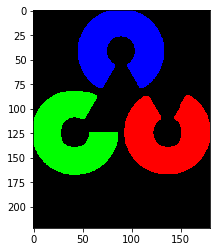

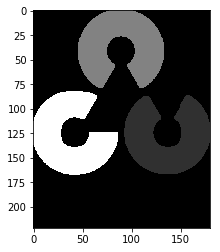

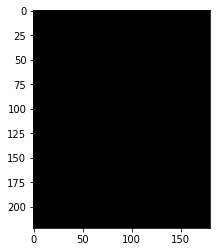

In [17]:
plt.figure() #Declara una figura como Matlab
plt.imshow(img) #Carga imagen a la figura

#Para las imagenes en escalas de grises hay que asignar un mapa de colores
#El mapa por defecto por defecto es Viridis
plt.figure() 
plt.imshow(img_gray, cmap = 'gray') 

plt.figure() 
plt.imshow(img_vacia) 

#Para mostrar todas las figuras en caso de trabajar en un script
plt.show()
#En una Jupyter Notebook esa línea no es necesaria dado que crea las figuras en la salida interna

Podemos trabajar con subplots al igual que en Matlab utilizando la función plt.subplot(num_filas,num_columnas,posicion)

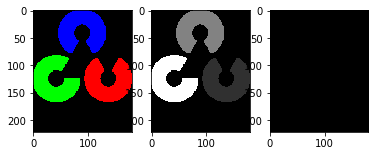

In [20]:
plt.subplot(1,3,1) #Declara una figura como Matlab
plt.imshow(img) #Carga imagen a la figura

plt.subplot(1,3,2) 
plt.imshow(img_gray, cmap = 'gray') 

plt.subplot(1,3,3) 
plt.imshow(img_vacia) 

plt.show()